### part - 1 fetch image list

In [1]:
import os

rootImageDir = "img_test/"
imageList = os.listdir(rootImageDir)

In [2]:
imageList

['apple23344.jpg',
 'apple5.JPG',
 'apple6.JPG',
 'apple_1114.JPG',
 'banana.jpeg',
 'banana_2.JPG',
 'fazli-mango-500x500.jpg',
 'fresh-apple-1212.jpg',
 'fresh-banana.jpg',
 'green_mangoes.jpg',
 'green_mango_2.jpg',
 'gvr.jpg',
 'mango_001.jpg',
 'Mango_Ataulfo.jpg',
 'orange1.jpeg',
 'orange2.jpg',
 'overripe_ataulfo_mango.png',
 'ripe_mango_1.jpg',
 'ripe_mango_2.jpg',
 'rotten_mango.jpg',
 'rotten_orange3.jpeg']

In [3]:
print("Number of images in test dir = ", len(imageList))

Number of images in test dir =  21


### part - 2 mark images with  ground truth id

In [4]:
labelIDDict = {
    "rotten banana": 0,
    "rotten apple": 1,
    "fresh banana": 2,
    "fresh mango": 3,
    "fresh orange": 4,
    "fresh apple": 5,
    "rotten mango": 6,
    "rotten orange": 7
}
groundTruthIDs = [5,1,1,5,0,0,3,5,2,5,5,5,5,5,4,4,5,5,5,6,7]

In [5]:
len(groundTruthIDs)

21

#### part - 3 classifier function

In [6]:
import tensorflow as tf

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

def classify(image_path):
    # Read in the image_data
    image_data = tf.gfile.FastGFile(image_path, 'rb').read()

    # Loads label file, strips off carriage return
    label_lines = [line.rstrip() for line
                   in tf.gfile.GFile("retrained_labels.txt")]

    # label_names = label_lines

    # Unpersists graph from file
    with tf.gfile.FastGFile("retrained_graph.pb", 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        tf.import_graph_def(graph_def, name='')

    with tf.Session() as sess:
        # Feed the image_data as input to the graph and get first prediction
        softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')

        predictions = sess.run(softmax_tensor, \
                               {'DecodeJpeg/contents:0': image_data})

        # global_pred = predictions

        # Sort to show labels of first prediction in order of confidence
        top_k = predictions[0].argsort()[-len(predictions[0]):][::-1]
        # label_id = top_k

        
        print('Result for {} :'.format(image_path))
        resultDict = {}
        for node_id in top_k:
            human_string = label_lines[node_id]
            score = predictions[0][node_id]
#              print('Category : {} \nScore = {} %'.format(human_string, score * 100))

            resultDict[human_string] = score
        
        #print('Category : {}\tScore : {}'.format(label_lines[node_id], predictions[0][node_id]))

        #print('\nDONE===========================', end='\n')
        
        return resultDict


#### part - 4 init  prediction array 

In [7]:
resultDictArray = []

#### part - 5 feed images to function

In [8]:
for image in imageList:
    p = os.path.join(rootImageDir, image)
    
    rDict = classify(image_path=p)
    
    # print(rDict)
    
    # get max
    maxKey = max(rDict.keys(), key=(lambda k: rDict[k]))
    resultDictArray.append({maxKey: rDict[maxKey]})

Result for img_test/apple23344.jpg :
Result for img_test/apple5.JPG :
Result for img_test/apple6.JPG :
Result for img_test/apple_1114.JPG :
Result for img_test/banana.jpeg :
Result for img_test/banana_2.JPG :
Result for img_test/fazli-mango-500x500.jpg :
Result for img_test/fresh-apple-1212.jpg :
Result for img_test/fresh-banana.jpg :
Result for img_test/green_mangoes.jpg :
Result for img_test/green_mango_2.jpg :
Result for img_test/gvr.jpg :
Result for img_test/mango_001.jpg :
Result for img_test/Mango_Ataulfo.jpg :
Result for img_test/orange1.jpeg :
Result for img_test/orange2.jpg :
Result for img_test/overripe_ataulfo_mango.png :
Result for img_test/ripe_mango_1.jpg :
Result for img_test/ripe_mango_2.jpg :
Result for img_test/rotten_mango.jpg :
Result for img_test/rotten_orange3.jpeg :


In [9]:
resultDictArray

[{'fresh apple': 0.51201886},
 {'rotten apple': 0.88880736},
 {'rotten apple': 0.87151408},
 {'fresh apple': 0.56395888},
 {'fresh banana': 0.89208728},
 {'rotten banana': 0.6282202},
 {'fresh mango': 0.88224083},
 {'rotten apple': 0.67588514},
 {'fresh banana': 0.99573225},
 {'fresh mango': 0.437235},
 {'fresh mango': 0.90095538},
 {'fresh mango': 0.9879908},
 {'rotten mango': 0.63794512},
 {'fresh mango': 0.67174166},
 {'fresh orange': 0.99340206},
 {'fresh orange': 0.93972635},
 {'rotten mango': 0.96351552},
 {'fresh mango': 0.98443758},
 {'fresh mango': 0.68203932},
 {'rotten mango': 0.94575709},
 {'rotten orange': 0.95765567}]

#### part - 5 create arrays for confusion matrix

In [17]:
y_true = groundTruthIDs
y_pred_score = []
y_pred = []
labels = list(labelIDDict)

for r in resultDictArray:
    label = list(r.keys())[0]
    prediction = r[label]
    
    
    y_pred.append(labelIDDict[label])
    y_pred_score.append(prediction)

In [18]:
y_pred

[5, 1, 1, 5, 2, 0, 3, 1, 2, 3, 3, 3, 6, 3, 4, 4, 6, 3, 3, 6, 7]

In [19]:
y_pred_score

[0.51201886,
 0.88880736,
 0.87151408,
 0.56395888,
 0.89208728,
 0.6282202,
 0.88224083,
 0.67588514,
 0.99573225,
 0.437235,
 0.90095538,
 0.9879908,
 0.63794512,
 0.67174166,
 0.99340206,
 0.93972635,
 0.96351552,
 0.98443758,
 0.68203932,
 0.94575709,
 0.95765567]

#### part - 6 confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix

cnf = confusion_matrix(y_true, y_pred)

In [21]:
cnf

array([[1, 0, 1, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0],
       [0, 1, 0, 6, 0, 2, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

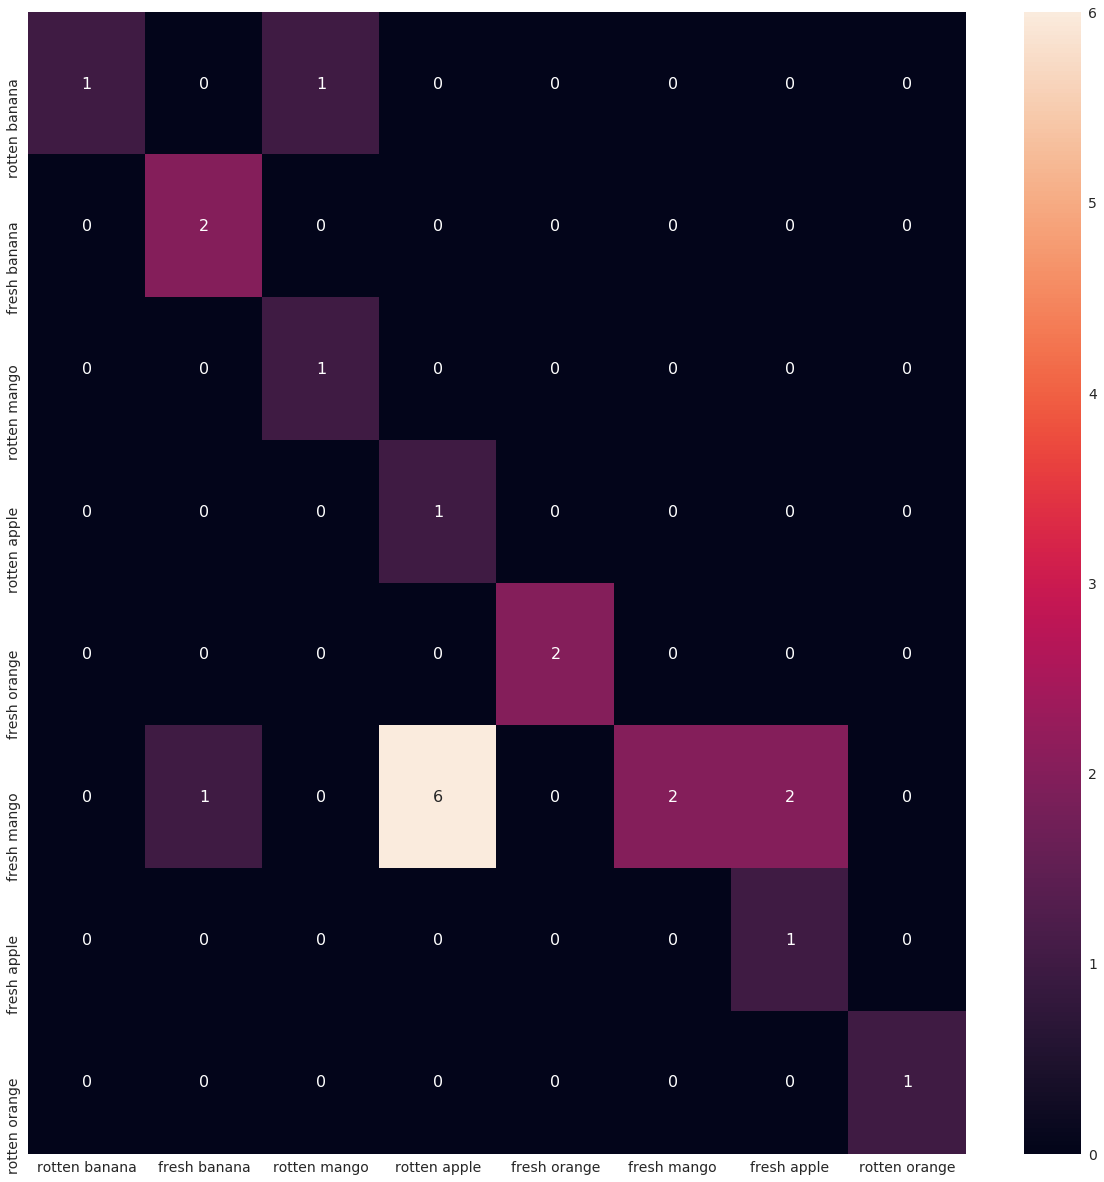

In [22]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cnf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (21,21))
# sn.heatmap(df_cm, annot=True)
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})

plt.show()
plt.savefig('confusion_matrix.png', format='png')